In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.models import Model
from keras.utils import to_categorical
import keras.backend as K

%matplotlib inline

K.set_image_data_format('channels_last')

In [60]:
def load_data():
    # Read the MNIST training data
    df = pd.read_csv('data/train.csv')
    X = df.drop(columns=['label'])
    X = X.values.reshape((-1, 28, 28, 1)) / 255.0 
    Y = df['label'].values
    Y = to_categorical(Y, num_classes=10)
    print('X shape:', X.shape)
    print('Y shape:', Y.shape)

    # shuffle training data
    indices = np.arange(len(Y))
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]

    # Keep part of data for validation
    index = 40000
    X_train = X_shuffled[:index]
    Y_train = Y_shuffled[:index]
    X_val = X_shuffled[index+1:]
    Y_val = Y_shuffled[index+1:]
    
    return X_train, Y_train, X_val, Y_val

In [61]:
X_train, Y_train, X_val, Y_val = load_data()

X shape: (42000, 28, 28, 1)
Y shape: (42000, 10)


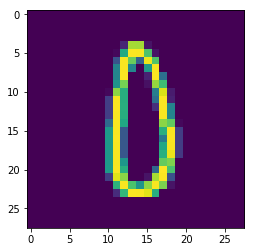

In [62]:
plt.imshow(X_train[0,:,:,0])  # view sample data

In [63]:
def DigitModel():
    # Input placeholder
    X_input = Input((28, 28, 1), name='input')

    # Layer-0 : Conv -> Relu -> Max Pooling
    X = Conv2D(16, (5,5), strides=(1,1), padding='same', name='conv0')(X_input)
    X = Activation('relu', name='a0')(X)
    X = MaxPooling2D((2, 2), name='max_pool0')(X)
    
    # Layer-1 : conv -> Relu -> Max Pooling
    X = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv1')(X)
    X = Activation('relu', name='a1')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)

    # Layer-2 : Flatten -> Fully Connected -> Softmax
    X = Flatten(name='flatten2')(X)
    X = Dense(10, name='dense2')(X)
    Y = Activation('softmax', name='a2')(X)

    # Create keras model
    model = Model(inputs=X_input, outputs=Y, name='DigitModel')
    
    return model

In [64]:
digit_model = DigitModel()

In [65]:
digit_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 16)        416       
_________________________________________________________________
a0 (Activation)              (None, 28, 28, 16)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 14, 14, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 32)        4640      
_________________________________________________________________
a1 (Activation)              (None, 14, 14, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 7, 7, 32)          0         
__________

In [66]:
digit_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
digit_model.fit(X_train, Y_train, epochs=30, batch_size=128)

Epoch 1/30
40000/40000 [==============================] - 3s 63us/step - loss: 0.4014 - acc: 0.8940
Epoch 2/30
40000/40000 [==============================] - 2s 54us/step - loss: 0.0931 - acc: 0.9725
Epoch 3/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0700 - acc: 0.9785
Epoch 4/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0552 - acc: 0.9837
Epoch 5/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0476 - acc: 0.9855
Epoch 6/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0421 - acc: 0.9870
Epoch 7/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0375 - acc: 0.9886
Epoch 8/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0347 - acc: 0.9894
Epoch 9/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0305 - acc: 0.9907
Epoch 10/30
40000/40000 [==============================] - 2s 53us/step - loss: 0.0274 - acc: 0.9916

In [68]:
digit_model.evaluate(X_val, Y_val, batch_size=64)

1999/1999 [==============================] - 0s 87us/step


[0.05088027620596081, 0.9869934967483742]

In [69]:
# Read test data
df = pd.read_csv('data/test.csv')
X_test = df.values.reshape((-1, 28, 28, 1)) / 255.0

In [70]:
# Predict results for the test data
results = digit_model.predict(X_test)
digits = [np.argmax(r) for r in results]

In [71]:
# Write the predictions
file = open('data/predictions.csv', 'w')
file.write('ImageId,Label\n')
for i, d in zip(range(len(digits)), digits):
    file.write(str(i+1)+','+str(d)+'\n')
file.close()